In [1]:
import tensorflow

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [4]:
import cv2

In [5]:
from sklearn.cluster import MiniBatchKMeans

In [6]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']

In [7]:
model = tensorflow.keras.models.load_model("Models/3rd-color_comp_model.h5")

In [126]:
image = tensorflow.keras.preprocessing.image.load_img("Sample_Pictures/Sea_Image.jpg")

In [127]:
def color_compress_KNN(image, KNN=4):
    import warnings; warnings.simplefilter('ignore') 
    Kmeans_images = []
    rescaled_image = np.array(image) / 255.0 # use 0...1 scale
    preprocessed_image = rescaled_image.reshape(150 * 150, 3)
    kmeans = MiniBatchKMeans(KNN)
    kmeans.fit(preprocessed_image)
    new_colors = kmeans.cluster_centers_[kmeans.predict(preprocessed_image)]
    color_compressed_image = new_colors.reshape(np.array(image).shape)
    reshaped_cci = cv2.resize(color_compressed_image, (75,75)).reshape(1,75,75,3)
    return reshaped_cci

In [128]:
image_cc = color_compress_KNN(image)
image_cc.shape

(1, 75, 75, 3)

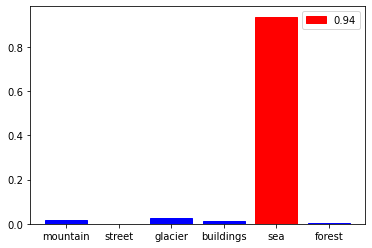

In [129]:
color_coder=dict(enumerate(model.predict(image_cc)[0],0))
fig, ax = plt.subplots()
ax =plt.bar([0,1,2,3,4,5], model.predict(image_cc)[0])
for i in color_coder:
    if color_coder[i] == model.predict(image_cc)[0].max():
        ax[i].set_color("r")
        Best_guess = mpatches.Patch(color='red', label=round(color_coder[i],2))
    else:
        ax[i].set_color("b")
plt.legend(handles=[Best_guess])
ax = plt.xticks(ticks=[0,1,2,3,4,5],labels=class_names)

In [130]:
def highest(dict_of_confidence):
    for i in dict_of_confidence:
        if dict_of_confidence[i] == model.predict(image)[0].max():
            return round(dict_of_confidence[i],2)

In [131]:
class_titles =[x.title() for x in class_names]

In [132]:
class_titles

['Mountain', 'Street', 'Glacier', 'Buildings', 'Sea', 'Forest']

In [133]:
highest(color_coder)

ValueError: Failed to find data adapter that can handle input: <class 'PIL.JpegImagePlugin.JpegImageFile'>, <class 'NoneType'>

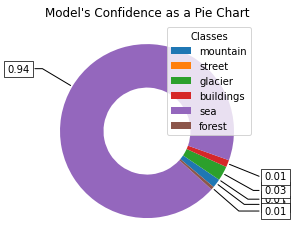

In [134]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
recipe = color_coder
data = color_coder.values()
wedges, texts = plt.pie(color_coder.values(), wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

ax.legend(wedges, class_names,title="Classes")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(round(color_coder[i],2), xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
ax.set_title("Model's Confidence as a Pie Chart")
plt.show()

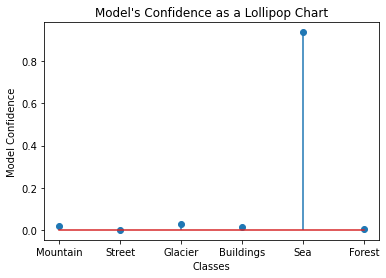

In [135]:
# creating an empty chart
fig, ax = plt.subplots()
  
# plotting using plt.stem
ax = plt.stem([0,1,2,3,4,5], model.predict(image_cc)[0])
plt.title("Model's Confidence as a Lollipop Chart")
plt.ylabel("Model Confidence")
plt.xlabel("Classes")
ax = plt.xticks(ticks=[0,1,2,3,4,5],labels=[x.title() for x in class_names])

In [136]:
image = image_cc

In [137]:
color_coder

{0: 0.016633274,
 1: 2.4022711e-05,
 2: 0.026856981,
 3: 0.013197136,
 4: 0.9375005,
 5: 0.005788077}

In [138]:
model.predict(image)[0][5]


0.005788077

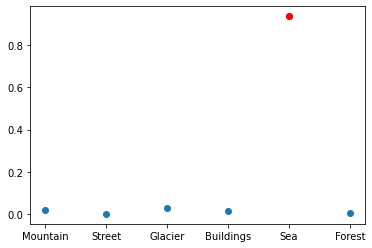

In [176]:
fig= plt.figure()
ax1=fig.add_subplot(111)
ax1.scatter([0,1,2,3,4,5], model.predict(image)[0])
for i in color_coder:
    if color_coder[i] == model.predict(image)[0].max():
        ax1.scatter([i], model.predict(image)[0][i], c ='r')
ax1= plt.xticks(ticks=[0,1,2,3,4,5],labels=[x.title() for x in class_names])

In [31]:
def pick_a_graph(model, image, graph_type="bar"):
    if graph_type == "bar":
        color_coder=dict(enumerate(model.predict(image_cc)[0],0))
        fig_bar, ax = plt.subplots(figsize=(15,10))
        ax = plt.bar([0,1,2,3,4,5], model.predict(image_cc)[0])
        for i in color_coder:
            if color_coder[i] == model.predict(image_cc)[0].max():
                ax[i].set_color("r")
                Best_guess = mpatches.Patch(color='red', label=round(color_coder[i],2))
            else:
                ax[i].set_color("b")
        plt.legend(handles=[Best_guess])
        plt.title("Model's Confidence as a Bar Chart")
        plt.ylabel("Model Confidence")
        plt.xlabel("Classes")
        ax = plt.xticks(ticks=[0,1,2,3,4,5],labels=[x.title() for x in class_names], size=10)
        return plt.show(fig_bar)
    elif graph_type == "pie":
        fig_pie, ax = plt.subplots(figsize=(15,10),subplot_kw=dict(aspect="equal"))
        color_coder=dict(enumerate(model.predict(image_cc)[0],0))
        recipe = color_coder
        data = color_coder.values()
        wedges, texts = plt.pie(color_coder.values(), wedgeprops=dict(width=0.5), startangle=-40)
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

        ax.legend(wedges, [x.title() for x in class_names], title="Classes")
        for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = "angle,angleA=0,angleB={}".format(ang)
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            ax.annotate(round(color_coder[i],2), xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                        horizontalalignment=horizontalalignment, **kw)
        ax.set_title("Model's Confidence as a Pie Chart")
        return plt.show(fig_pie)

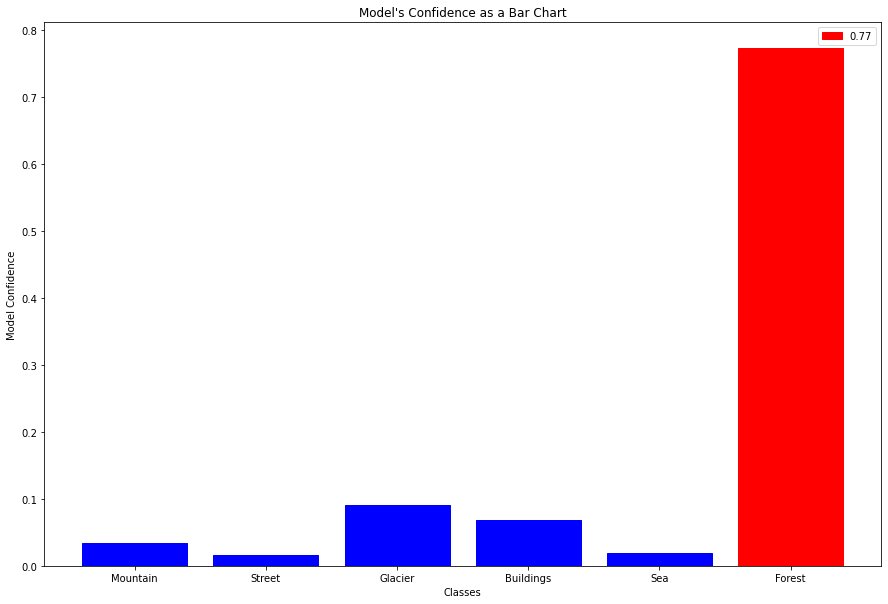

In [32]:
pick_a_graph(model, image_cc)

In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [ ]:
def image_expl(model,image_array):
    '''
    Takes a model, single image array, name string of the model, and the true label of the image.
    Uses LIME to get an image explainer and plots the image and explaination.
    '''
    
    fig, ax = plt.subplots()
    #instantiate explainer
    explainer = lime_image.LimeImageExplainer(random_state=1)
    #explain an image caste to double bc updated keras version, pass predictor 
    explanation = explainer.explain_instance(image_array[0].astype('double'), model.predict)
    #show the image
    ax = plt.imshow(image_array[0])
    #get the mask for the prediction
    temp, mask = explanation.get_image_and_mask(model.predict(image_array.reshape((1,75,75,3))).argmax(axis=1)[0], positive_only=False, hide_rest=False)
    #show image and mask together
    ax = plt.imshow(mark_boundaries(temp, mask))
    plt.axis("off")
    
    ax = plt.title("It works!")

In [ ]:
image_expl(model, image_cc)